# EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mutual_info_score

# Set style for better visualizations
plt.style.use('seaborn-v0_8-notebook')
sns.set_palette("husl")

## 1) Load the dataset

In [2]:
df = pd.read_csv('../data/dataset.csv')
df.head()

,score,release_year,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,valence,tempo,explicit,song_type,followers,popularity,artist_type,main_genre
0,133,1989,300440,7,1,4,0.181000,0.763,0.440,0.000457,...,-13.110,0.0388,0.4210,120.492,False,Solo,226699.0,61.0,band,dance pop
1,35,2009,215814,2,1,4,0.006300,0.600,0.153,0.855000,...,-14.028,0.0492,0.2550,172.050,False,Solo,11647.0,28.0,-,-
2,485,2003,233267,7,1,4,0.000065,0.553,0.717,0.128000,...,-5.857,0.0318,0.3180,127.947,False,Solo,1545572.0,72.0,band,modern rock
3,268,2018,193680,1,0,4,0.082200,0.353,0.755,0.000000,...,-6.276,0.7330,0.4370,191.153,False,Solo,5856419.0,84.0,singer,canadian contemporary r&b
4,1209,1994,291800,7,1,4,0.236000,0.348,0.924,0.000000,...,-3.048,0.0945,0.0869,114.117,False,Solo,243179.0,56.0,-,album rock


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20402 entries, 0 to 20401
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   score             20402 non-null  int64  
 1   release_year      20402 non-null  int64  
 2   duration_ms       20402 non-null  int64  
 3   key               20402 non-null  int64  
 4   mode              20402 non-null  int64  
 5   time_signature    20402 non-null  int64  
 6   acousticness      20402 non-null  float64
 7   danceability      20402 non-null  float64
 8   energy            20402 non-null  float64
 9   instrumentalness  20402 non-null  float64
 10  liveness          20402 non-null  float64
 11  loudness          20402 non-null  float64
 12  speechiness       20402 non-null  float64
 13  valence           20402 non-null  float64
 14  tempo             20402 non-null  float64
 15  explicit          20402 non-null  bool   
 16  song_type         20402 non-null  object

## 2) Examine and Clean data

In [4]:
df.describe(include='all')

,score,release_year,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,valence,tempo,explicit,song_type,followers,popularity,artist_type,main_genre
count,20402.000000,20402.000000,2.040200e+04,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,...,20402.000000,20402.000000,20402.000000,20402.000000,20402,20402,2.039900e+04,20400.000000,20400,20400
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,NaN,NaN,6,492
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,Solo,NaN,NaN,singer,album rock
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18740,18975,NaN,NaN,8039,2218
mean,777.384521,1987.499069,2.295247e+05,5.224537,0.726988,3.943584,0.265215,0.600356,0.625031,0.047551,...,-8.845347,0.067533,0.607777,120.310803,NaN,NaN,1.786720e+06,57.540735,NaN,NaN
std,766.740996,16.414883,6.696398e+04,3.566935,0.445518,0.289183,0.264377,0.150620,0.197119,0.168430,...,3.593065,0.074373,0.236530,27.683967,NaN,NaN,4.804166e+06,21.160421,NaN,NaN
min,1.000000,1964.000000,2.460400e+04,0.000000,0.000000,0.000000,0.000001,0.000000,0.006640,0.000000,...,-30.896000,0.000000,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,NaN,NaN
25%,170.000000,1972.250000,1.864930e+05,2.000000,0.000000,4.000000,0.039200,0.502000,0.481000,0.000000,...,-11.217750,0.031900,0.427000,99.734250,NaN,NaN,2.629000e+04,44.000000,NaN,NaN
50%,563.000000,1985.000000,2.230260e+05,5.000000,1.000000,4.000000,0.169500,0.608000,0.640000,0.000010,...,-8.471000,0.040400,0.632000,118.951000,NaN,NaN,2.712920e+05,61.000000,NaN,NaN
75%,1181.000000,2002.000000,2.596930e+05,8.000000,1.000000,4.000000,0.440000,0.706000,0.783000,0.001107,...,-6.051000,0.063000,0.804000,135.898250,NaN,NaN,1.253545e+06,73.000000,NaN,NaN


### First conclusions:

* The target variable 'score' may need transformation because of its high standard deviation
* Analyze how scores change over 'release_year'
* Plot distribution and check outliers for numerical features = ['followers', 'popularity', 'acousticness', 'liveness', 'speechiness', 'instrumentalness', 'loudness', 'energy', 'danceability', 'valence', 'duration_ms', 'tempo']
    * a 'loudness' > 0 is not possible
    * 'followers' and 'duration_ms': These might need scaling due to their large ranges
* Check frequency counts and handle possible imbalance for categorical features = ['genre', 'artist_type', 'song_type', 'explicit', 'key', 'mode', 'time_signature']
    * 'key', 'mode' and 'time_signature' are categorical features: they need conversion
    * Handle 'main_genre': group similar ones, keep only the most common ones
* Handle missing values for 'followers', 'popularity', 'artist_type' and 'main_genre'
    

### Handle 'key', 'mode' and 'time_signature'
These categorical variables are represented by numbers. For converting, I'll use the following map according to the Spotify API documentation:
* 'key': C, (C♯, D♭), D, (D♯, E♭), E, F, (F♯, G♭), G, (G♯, A♭), A, (A♯, B♭), B
* 'mode': major, minor
* 'time_signature': 1/4, 3/4, 4/4, 5/4

Let's convert:

In [5]:
df.key.value_counts()

key
0     2577
7     2370
2     2170
9     2163
5     1805
1     1778
4     1635
11    1461
10    1421
6     1208
8     1176
3      638
Name: count, dtype: int64

In [6]:
key_values = {
    0: 'C',
    1: 'C♯, D♭',
    2: 'D',
    3: 'D♯, E♭',
    4: 'E',
    5: 'F',
    6: 'F♯, G♭',
    7: 'G',
    8: 'G♯, A♭',
    9: 'A',
    10: 'A♯, B♭',
    11: 'B'
}

df.key = df.key.map(key_values)

In [7]:
df['mode'].value_counts(normalize=True)

mode
1    0.726988
0    0.273012
Name: proportion, dtype: float64

As 'mode' is binary, I don't transform it

In [8]:
df.time_signature.value_counts()

time_signature
4    19134
3     1085
5      121
1       61
0        1
Name: count, dtype: int64

In [9]:
df[df.time_signature == 0]

,score,release_year,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,valence,tempo,explicit,song_type,followers,popularity,artist_type,main_genre
15953,2217,1964,147000,C,1,0,0.842,0.0,0.405,0.00114,...,-9.935,0.0,0.0,0.0,False,Solo,1798979.0,73.0,singer,adult standards


In [10]:
df[df.tempo == 0]

,score,release_year,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,valence,tempo,explicit,song_type,followers,popularity,artist_type,main_genre
15953,2217,1964,147000,C,1,0,0.842,0.0,0.405,0.00114,...,-9.935,0.0,0.0,0.0,False,Solo,1798979.0,73.0,singer,adult standards


There is only one song with no time signature and corresponds with the only one without tempo, which is coherent

In [11]:
time_signature_values = {
    0: 'not applicable',
    1: '1/4',
    3: '3/4',
    4: '4/4',
    5: '5/4'
}

df.time_signature = df.time_signature.map(time_signature_values)

### Handle 'main_genre'

In [12]:
df.main_genre.unique()

array(['dance pop', '-', 'modern rock', 'canadian contemporary r&b',
       'album rock', 'arkansas country', 'dance rock', 'dancehall',
       'canadian pop', 'classic rock', 'alternative hip hop',
       'classic soul', 'brill building pop', 'alternative pop',
       'blues-rock', 'glam metal', 'grunge pop', 'reggae',
       'classic uk pop', 'contemporary country', 'australian pop',
       'adult standards', 'acoustic pop', 'motown', 'hip hop',
       'beach music', 'art rock', 'karaoke', 'east coast hip hop',
       'chicago drill', 'emo rap', 'classic canadian rock', 'bass trap',
       'soft rock', 'freestyle', 'chicago soul', 'cowpunk',
       'british soul', 'atl hip hop', 'bluegrass', 'alternative metal',
       'funk', 'jazz blues', 'detroit hip hop', 'bow pop', 'idol',
       'rhythm and blues', 'chicago rap', 'country road',
       'british invasion', 'crunk', 'afrobeat', 'art pop', 'neo soul',
       'alternative rock', 'space age pop', 'classic girl group',
       'euroda

In [13]:
genre_mapping = {
    'pop': ['pop', 'dance pop', 'canadian pop', 'brill building pop', 'alternative pop', 'classic uk pop', 'australian pop', 'acoustic pop', 'bow pop', 'idol', 'art pop', 'space age pop', 'post-teen pop', 'new wave pop', 'candy pop', 'teen pop', 'classic swedish pop', 'austropop', 'indie pop', 'europop', 'britpop', 'afropop', 'power pop', 'pop rap', 'indie pop rap', 'latin pop', 'sunshine pop', 'baroque pop', 'ecuadorian pop', 'chamber pop', 'colombian pop', 'antiviral pop', 'belgian pop', 'french pop', 'operatic pop', 'k-pop', 'dutch pop', 'jewish pop', 'classic norwegian pop', 'german pop', 'nederpop', 'latin viral pop', 'classic danish pop', 'channel pop', 'nyc pop', 'metropopolis', 'danish pop', 'deep acoustic pop', 'israeli pop', 'classic italian pop', 'classic belgian pop', 'classic nz pop', 'reunion pop', 'vapor pop'],
    'rock': ['rock', 'album rock', 'dance rock', 'classic rock', 'hard rock', 'grunge pop', 'art rock', 'classic canadian rock', 'cowpunk', 'british invasion', 'alternative rock', 'emo', 'neo mellow', 'permanent wave', 'indie rock', 'glam rock', 'yacht rock', 'classic russian rock', 'jangle pop', 'mellow gold', 'belgian rock', 'rock-and-roll', 'classic garage rock', 'psychedelic rock', 'australian rock', 'new romantic', 'c86', 'psychedelic blues-rock', 'garage rock', 'surf music', 'new wave', 'boston rock', 'canadian rock', 'modern alternative rock', 'irish rock', 'rap rock', 'melodic hard rock', 'progressive rock', 'experimental rock', 'pop rock', 'christian alternative rock', 'canadian pop punk', 'indie poptimism', 'pub rock', 'german hard rock', 'australian alternative rock', 'pop punk', 'deep new wave', 'indie shoegaze', 'crust punk', 'deep melodic hard rock', 'swedish alternative rock', 'alternative pop rock', 'deep punk rock', 'roots rock', 'anarcho-punk', 'horror punk', 'merseybeat', 'freakbeat', 'j-poprock', 'deep classic garage rock', 'celtic rock', 'scottish new wave', 'british indie rock', 'screamo punk', 'mod revival', 'dance-punk', 'easycore', 'czech rock', 'piano rock', 'argentine punk', 'french shoegaze', 'neo-rockabilly', 'dutch rock', 'post-grunge'],
    'hip hop/rap': ['hip hop', 'rap', 'alternative hip hop', 'east coast hip hop', 'chicago drill', 'emo rap', 'bass trap', 'freestyle', 'atl hip hop', 'detroit hip hop', 'chicago rap', 'crunk', 'canadian hip hop', 'conscious hip hop', 'dfw rap', 'gangster rap', 'philly rap', 'chicano rap', 'lgbtq+ hip hop', 'g funk', 'hip pop', 'p funk', 'dirty south rap', 'baton rouge rap', 'houston rap', 'new jersey rap', 'nyc rap', 'hardcore hip hop', 'cali rap', 'florida rap', 'deep east coast hip hop', 'trap music', 'bounce', 'battle rap', 'hyphy', 'escape room', 'deep freestyle', 'viral trap', 'urban contemporary', 'miami hip hop', 'australian hip hop', 'trap soul', 'hawaiian hip hop', 'rap conscient', 'deep southern trap', 'nc hip hop', 'old school hip hop', 'chinese hip hop', 'bboy', 'new orleans rap', 'new jack smooth', 'alabama rap', 'detroit trap'],
    'soul/r&b': ['soul', 'classic soul', 'r&b', 'canadian contemporary r&b', 'motown', 'deep motown', 'beach music', 'chicago soul', 'british soul', 'rhythm and blues', 'neo soul', 'northern soul', 'deep pop r&b', 'new jack swing', 'quiet storm', 'deep southern soul', 'deep northern soul', 'alternative r&b', 'memphis soul', 'southern soul', 'philly soul', 'neo r&b', 'gospel r&b', 'traditional soul', 'japanese r&b', 'indie r&b'],
    'country': ['country', 'contemporary country', 'arkansas country', 'bluegrass', 'country road', 'australian country', 'country rock', 'cosmic american', 'country dawn', 'heartland rock', 'canadian country', 'alberta country', 'nashville sound', 'alternative country', 'modern rock', 'modern country rock', 'southern rock', 'progressive bluegrass', 'traditional country', 'neo-traditional country', 'modern southern rock', 'outlaw country', 'deep contemporary country'],
    'reggae': ['reggae', 'dancehall', 'reggae fusion', 'lovers rock', 'uk reggae', 'soca', 'dub', 'rock steady', 'gospel reggae'],
    'blues': ['blues', 'blues-rock', 'british blues', 'electric blues', 'louisiana blues', 'jump blues', 'canadian blues', 'acoustic blues', 'soul blues'],
    'metal': ['metal', 'alternative metal', 'glam metal', 'alabama metal', 'metalcore', 'buffalo ny metal', 'nu-metalcore', 'corrosion', 'groove metal', 'german metalcore', 'christian metal', 'j-metal', 'comic metal', 'gothic metal'],
    'adult standards': ['adult standards', 'deep adult standards', 'soft rock', 'deep soft rock'],
    'funk': ['funk', 'deep funk', 'rare groove', 'minneapolis sound', 'brit funk', 'funk rock', 'instrumental funk', 'go-go', 'funk metal'],
    'jazz': ['jazz blues', 'vocal jazz', 'jazz trumpet', 'acid jazz', 'bebop', 'smooth jazz', 'soul jazz', 'jazz funk', 'jam band', 'bossa nova jazz', 'jazz organ', 'contemporary post-bop', 'big band', 'jazz guitar', 'jazz saxophone', 'jazz violin', 'jazz electric bass', 'british jazz', 'neo soul-jazz', 'indie jazz', 'cool jazz', 'deep free jazz', 'jazz vibraphone', 'dixieland', 'latin jazz'],
    'folk/indie': ['folk', 'american folk revival', 'lilith', 'canadian folk', 'british folk', 'folk rock', 'alaska indie', 'folk-pop', 'canadian indie', 'michigan indie', 'australian indie', 'scottish singer-songwriter', 'icelandic indie', 'canadian singer-songwriter', 'canadian celtic', 'scottish americana', 'alabama indie', 'ectofolk', 'appalachian folk', 'singer-songwriter', 'albuquerque indie', 'cantautor', 'chanson', 'psychedelic folk', 'dutch indie', 'k-indie', 'brooklyn indie', 'anti-folk', 'la indie', 'deep new americana', 'neo-singer-songwriter', 'indian indie', 'manitoba indie', 'indie folk'],
    'disco': ['disco', 'deep disco', 'disco house', 'italian disco', 'post-disco', 'bubble trance', 'post-disco soul'],
    'electronic/dance': ['electro', 'eurodance', 'big beat', 'brostep', 'miami bass', 'hardcore techno', 'hip house', 'trip hop', 'australian dance', 'hi-nrg', 'diva house', 'chicago house', 'electroclash', 'edm', 'electropop', 'big room', 'alternative dance', 'deep groove house', 'synthpop', 'aussietronica', 'easy listening', 'brazilian house', 'vocal house', 'electronic', 'electro latino', 'hopebeat', 'acid house', 'ballroom', 'electropowerpop', 'downtempo', 'bass trip', 'tropical house', 'electrofox', 'cyberpunk', 'lo-fi beats', 'deep vocal house', 'ebm', 'basshall', 'belgian dance', 'vintage french electronic', 'deep eurodance', 'deep progressive trance', 'electro house', 'dubstep', 'pop edm', 'bassline', 'detroit house', 'deep house', '8-bit', 'gabba', 'funky tech house', 'neo-synthpop', 'german techno', 'moog', 'lounge'],
    'classical/soundtrack': ['classic soundtrack', 'hollywood', 'orchestra', 'anthem worship', 'movie tunes', 'disney', 'broadway', 'show tunes', 'classical performance', 'coverchill', 'healing', 'german soundtrack', 'classical', 'scorecore', 'canadian soundtrack'],
    'gospel': ['gospel', 'contemporary gospel', 'doo-wop', 'country gospel', 'anglican liturgy', 'canadian ccm', 'ccm', 'deep latin christian', 'muzica crestina', 'pinoy praise'],
    'kids': ['kids dance party', 'boy band', 'bubblegum pop', 'bubblegum dance', "children's music", 'musica para ninos', 'boy pop', 'classic girl group', 'girl group', 'j-pop girl group', 'musica infantil', "australian children's music"],
    'traditional': ['afrobeat', 'swamp pop', 'spanish invasion', 'flamenco', 'finnish rockabilly', 'sertanejo', 'bossa nova', 'mpb', 'latin', 'paracana', 'funana', 'reggaeton', 'celtic', 'bolero', 'bachata', 'boogaloo', 'native american', 'classic schlager', 'canadian latin', 'afrikaans', 'azonto', 'cabaret', 'cumbia', 'traditional rockabilly', 'tejano', 'romantico', 'banjo', 'choro', 'acoustic opm', 'chutney'],
    'functional': ['piano cover', 'karaoke', 'sleep', 'lullaby', 'a cappella', 'comic', 'clean comedy', 'comedy', 'audiophile vocal', 'workout product', 'song poem', 'halloween', 'tribute'],
    'instrument': ['cello', 'pianissimo', 'didgeridoo', 'steelpan', 'bagpipe', 'music box'],
    'other': ['fake', 'outsider', 'talent show', 'deep talent show', 'classify', 'avant-garde', 'experimental', 'melancholia', 'nan']
}

def map_genre(main_genre):
    for genre, subgenres in genre_mapping.items():
        if main_genre in subgenres:
            return genre
    return 'unknown'  # For any genre not in the mapping

df['genre'] = df['main_genre'].apply(map_genre)
df = df.drop(['main_genre'], axis=1)
df

,score,release_year,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,valence,tempo,explicit,song_type,followers,popularity,artist_type,genre
0,133,1989,300440,G,1,4/4,0.181000,0.763,0.440,0.000457,...,-13.110,0.0388,0.4210,120.492,False,Solo,226699.0,61.0,band,pop
1,35,2009,215814,D,1,4/4,0.006300,0.600,0.153,0.855000,...,-14.028,0.0492,0.2550,172.050,False,Solo,11647.0,28.0,-,unknown
2,485,2003,233267,G,1,4/4,0.000065,0.553,0.717,0.128000,...,-5.857,0.0318,0.3180,127.947,False,Solo,1545572.0,72.0,band,country
3,268,2018,193680,"C♯, D♭",0,4/4,0.082200,0.353,0.755,0.000000,...,-6.276,0.7330,0.4370,191.153,False,Solo,5856419.0,84.0,singer,soul/r&b
4,1209,1994,291800,G,1,4/4,0.236000,0.348,0.924,0.000000,...,-3.048,0.0945,0.0869,114.117,False,Solo,243179.0,56.0,-,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20397,5779,1998,318773,B,1,4/4,0.315000,0.391,0.514,0.000006,...,-6.398,0.0447,0.4370,177.872,False,Solo,74445.0,56.0,singer,folk/indie
20398,153,1966,206427,D,0,4/4,0.100000,0.489,0.531,0.000000,...,-13.871,0.0345,0.6120,153.589,False,Solo,15728.0,46.0,-,pop
20399,623,1989,258147,C,1,4/4,0.000833,0.585,0.906,0.018900,...,-8.235,0.0564,0.7470,122.132,False,Solo,1283375.0,71.0,band,rock
20400,1403,2004,202760,G,1,4/4,0.123000,0.443,0.885,0.000031,...,-6.172,0.0414,0.5360,185.034,False,Solo,735490.0,65.0,duo,country


### Handle 'loudness'

In [14]:
df.loudness[df.loudness >= 0]

9874     2.291
15754    3.440
Name: loudness, dtype: float64

In [15]:
# Correct positive loudness values by making them negative
df.loc[df['loudness'] > 0, 'loudness'] *= -1

In [16]:
# Check that there are no positive loudness values left
assert (df['loudness'] <= 0).all(), "Some loudness values are still positive!"

### Handle Missing Values

In [17]:
df.isnull().sum()

score               0
release_year        0
duration_ms         0
key                 0
mode                0
time_signature      0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
valence             0
tempo               0
explicit            0
song_type           0
followers           3
popularity          2
artist_type         2
genre               0
dtype: int64

I decide to fill the 3 missing 'followers' and 2 'popularity' by their respective median value:

In [18]:
df.followers = df.followers.fillna(df.followers.median())
df.popularity = df.popularity.fillna(df.popularity.median())

In [19]:
df.artist_type.value_counts()

artist_type
singer    8039
band      6775
-         4164
rapper     895
duo        458
DJ          69
Name: count, dtype: int64

Let's for now replace the 2 'artist_type' missing values by the '-' category:

In [20]:
df.artist_type = df.artist_type.fillna('-')

In [21]:
df.isnull().sum()

score               0
release_year        0
duration_ms         0
key                 0
mode                0
time_signature      0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
valence             0
tempo               0
explicit            0
song_type           0
followers           0
popularity          0
artist_type         0
genre               0
dtype: int64

## 3) Analyse Target variable: 'score'

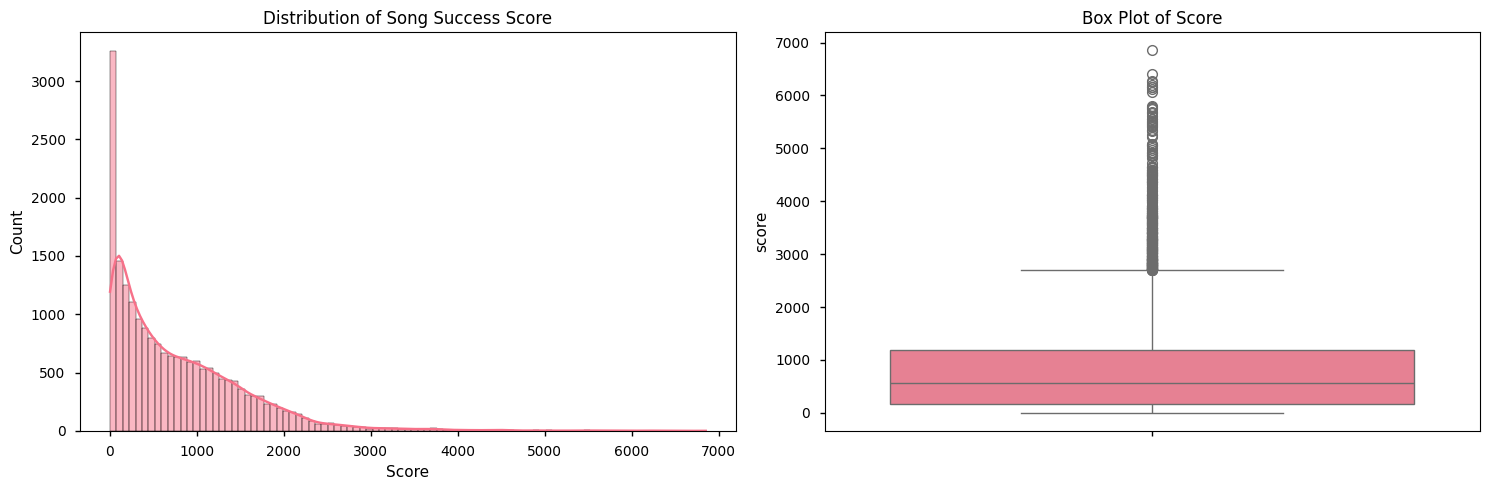

In [22]:
plt.figure(figsize=(15, 5))

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(df['score'], kde=True)
plt.title('Distribution of Song Success Score')
plt.xlabel('Score')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['score'])
plt.title('Box Plot of Score')

plt.tight_layout()
plt.show()

In [23]:
# Check for skewness and kurtosis
print("\nSkewness:", stats.skew(df['score']))
print("Kurtosis:", stats.kurtosis(df['score']))


Skewness: 1.6995306751289703
Kurtosis: 4.797648624966671


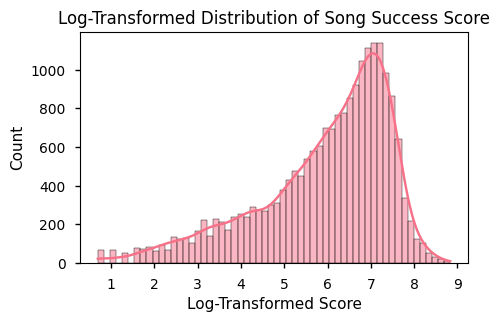

In [24]:
# Plot log-transformed distribution
plt.figure(figsize=(5, 3))
sns.histplot(np.log1p(df['score']), kde=True)
plt.title("Log-Transformed Distribution of Song Success Score")
plt.xlabel("Log-Transformed Score")
plt.show()

## 4) Analyse numerical features

In [29]:
numerical = ['release_year', 'duration_ms', 'followers', 'popularity', 'acousticness', 'liveness', 'speechiness', 
            'instrumentalness', 'loudness', 'energy', 'danceability', 'valence', 'tempo']

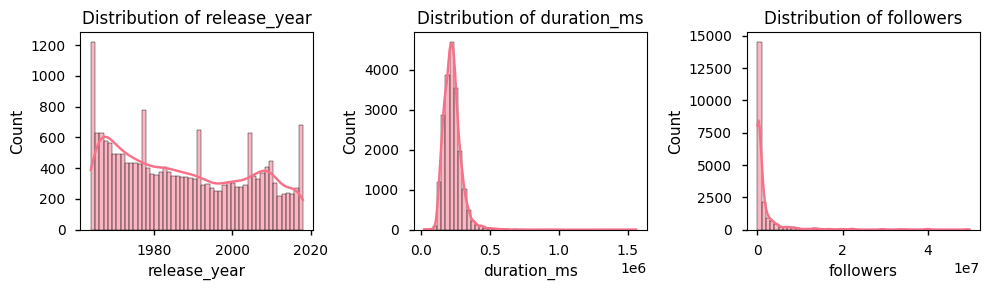

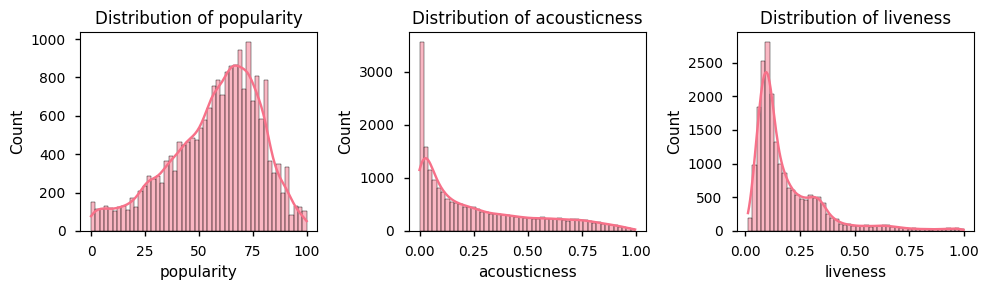

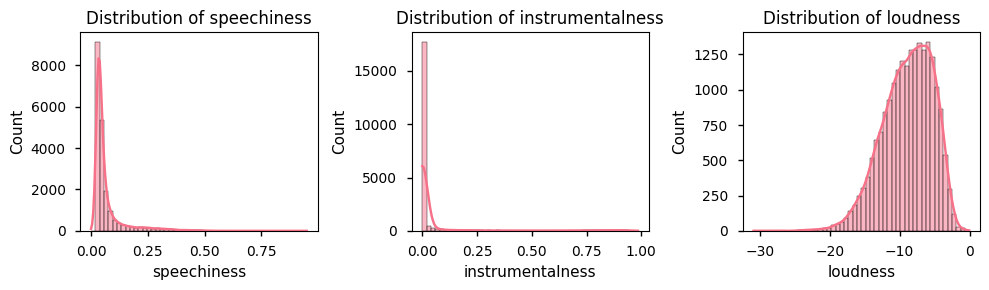

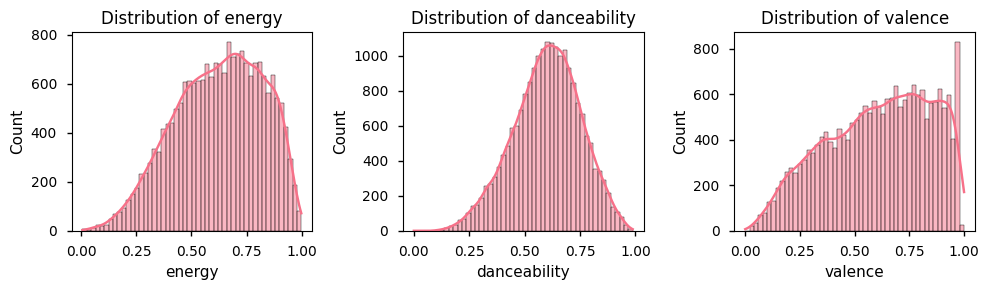

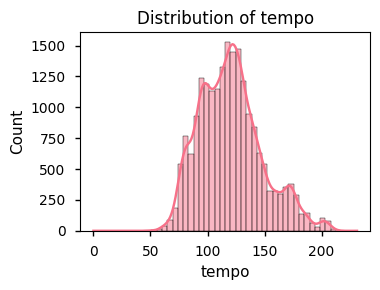

In [38]:
for i in range(0, len(numerical), 3):
        plt.figure(figsize=(10, 3))
        for j in range(3):
            if i + j < len(numerical):
                plt.subplot(1, 3, j+1)
                sns.histplot(df[numerical[i+j]], bins=50, kde=True)
                plt.title(f'Distribution of {numerical[i+j]}')
        plt.tight_layout()
        plt.show()

'duration_ms' and 'followers' need a log-transformation, due to their very large range compare to other features between 0 and 1:

In [27]:
df['duration_log'] = np.log1p(df['duration_ms'])
df['followers_log'] = np.log1p(df['followers'])

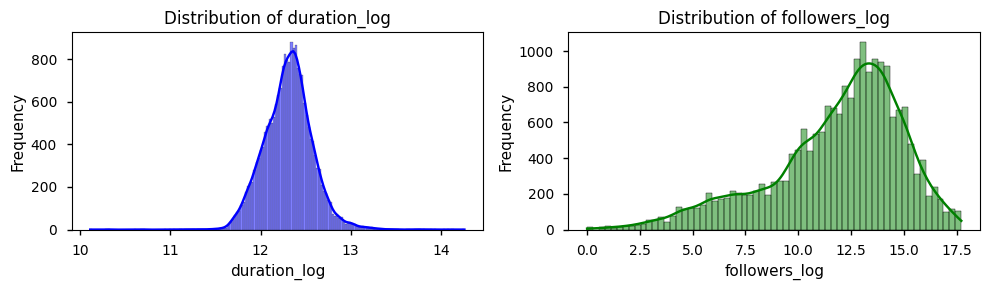

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df['duration_log'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of duration_log')
axes[0].set_xlabel('duration_log')
axes[0].set_ylabel('Frequency')

sns.histplot(df['followers_log'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of followers_log')
axes[1].set_xlabel('followers_log')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

At the end, numerical features may need to be standardized or scaled to center the data and make them all comparable.

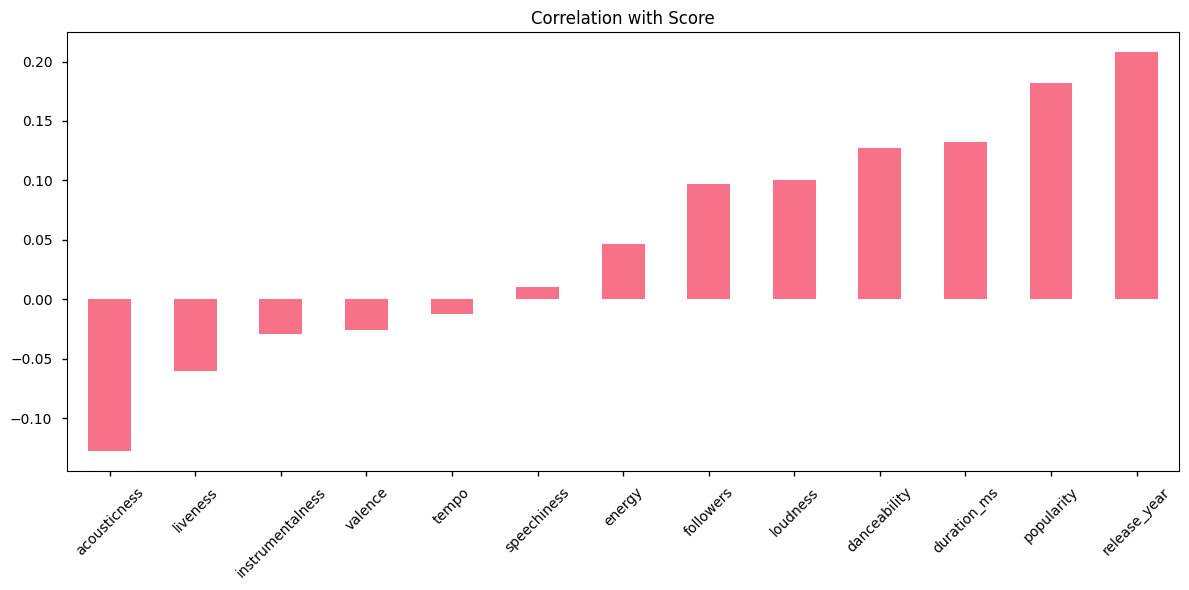

In [30]:
correlations = df[numerical].corrwith(df['score'])
plt.figure(figsize=(12, 6))
correlations.sort_values().plot(kind='bar')
plt.title('Correlation with Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5) Analyse categorical features

In [28]:
categorical = ['key', 'mode', 'time_signature', 'explicit', 'song_type', 'artist_type', 'genre']


Value counts for key:
key
C    0.126311
G    0.116165
D    0.106362
A    0.106019
F    0.088472
Name: proportion, dtype: float64
Number of unique values: 12

Value counts for mode:
mode
1    0.726988
0    0.273012
Name: proportion, dtype: float64
Number of unique values: 2


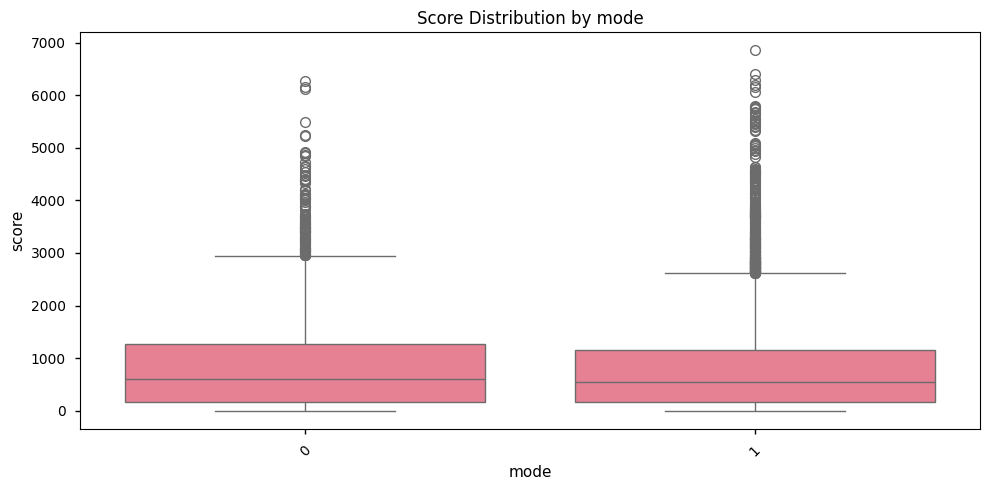


Value counts for time_signature:
time_signature
4/4               0.937849
3/4               0.053181
5/4               0.005931
1/4               0.002990
not applicable    0.000049
Name: proportion, dtype: float64
Number of unique values: 5


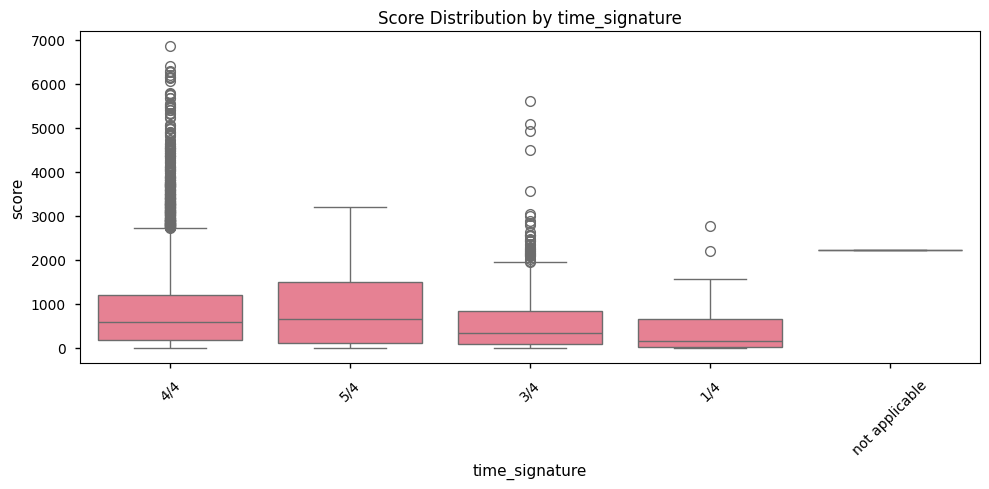


Value counts for explicit:
explicit
False    0.918537
True     0.081463
Name: proportion, dtype: float64
Number of unique values: 2


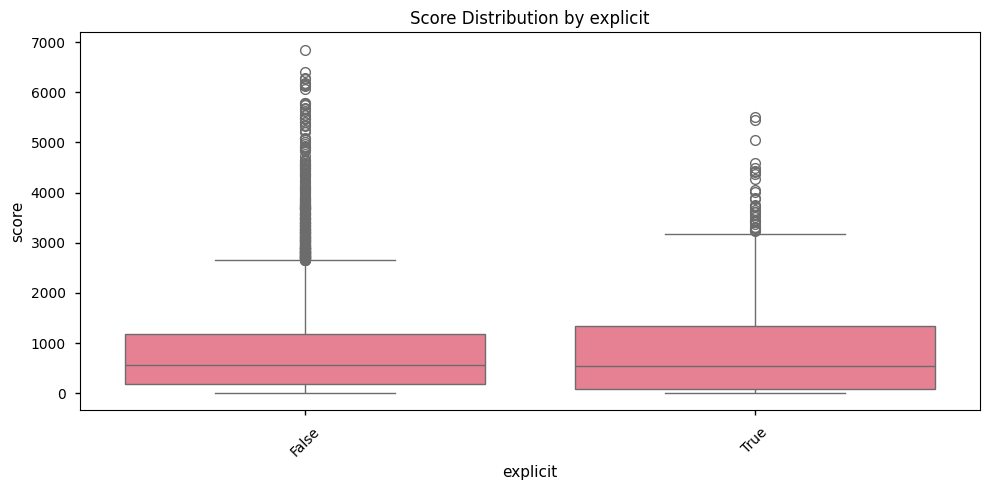


Value counts for song_type:
song_type
Solo             0.930056
Collaboration    0.069944
Name: proportion, dtype: float64
Number of unique values: 2


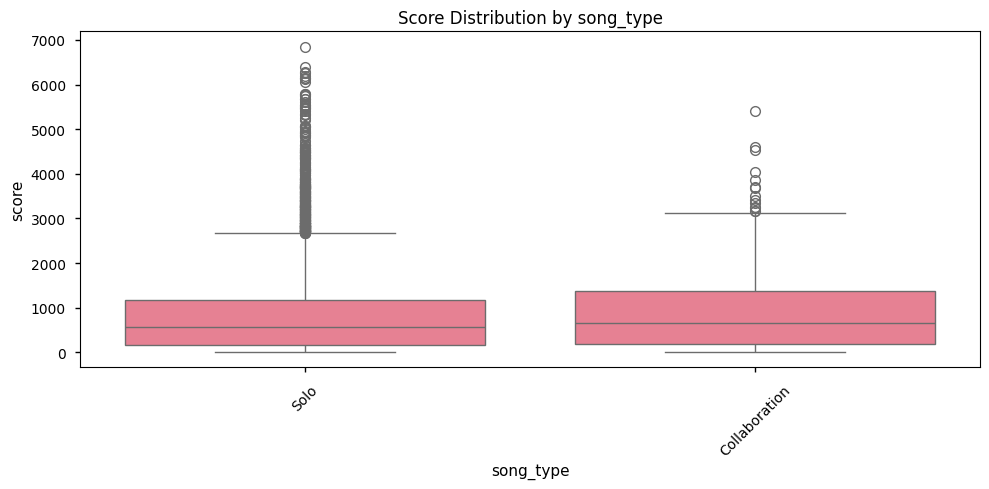


Value counts for artist_type:
artist_type
singer    0.394030
band      0.332075
-         0.204196
rapper    0.043868
duo       0.022449
Name: proportion, dtype: float64
Number of unique values: 6


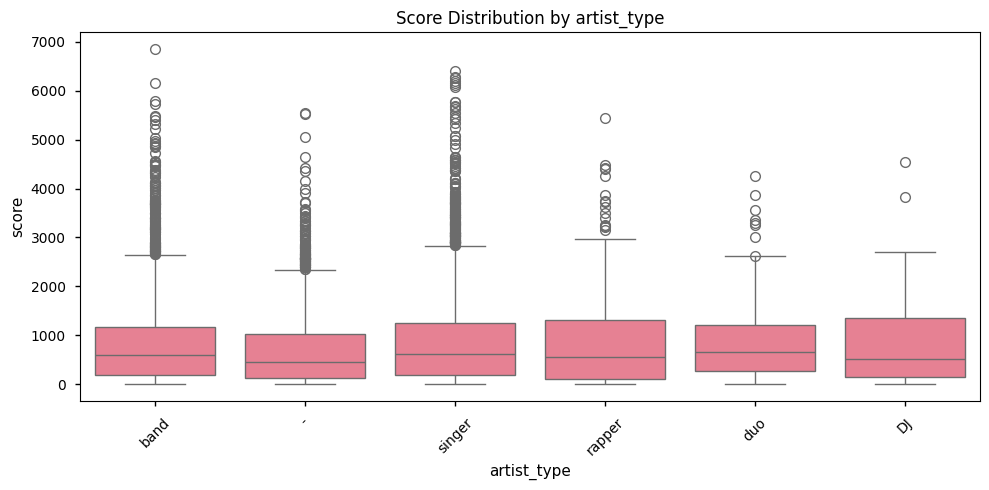


Value counts for genre:
genre
rock               0.184786
pop                0.176012
unknown            0.108372
adult standards    0.090481
soul/r&b           0.083962
Name: proportion, dtype: float64
Number of unique values: 22


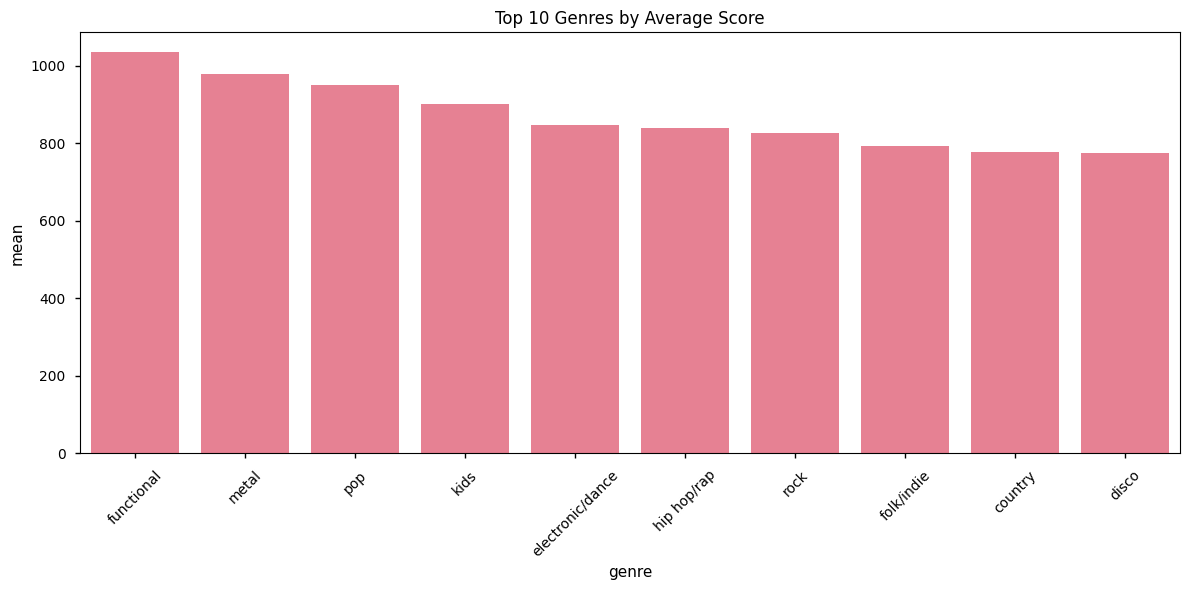

In [29]:
for feature in categorical:
        print(f"\nValue counts for {feature}:")
        print(df[feature].value_counts(normalize=True).head())
        print(f"Number of unique values: {df[feature].nunique()}")
        # mean_score_by_category = df.groupby(feature)['score'].mean().sort_values(ascending=False)
        # print(f"Mean Score by {feature}:\n", mean_score_by_category, "\n")
        
        if df[feature].nunique() < 10:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=feature, y='score', data=df)
            plt.title(f'Score Distribution by {feature}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        
        # For genre, show top 10 genres by average score
        if feature == 'genre':
            top_genres = df.groupby('genre')['score'].agg(['mean', 'count'])\
                          .sort_values('mean', ascending=False)\
                          .query('count >= 10')\
                          .head(10)
            plt.figure(figsize=(12, 6))
            sns.barplot(x=top_genres.index, y='mean', data=top_genres)
            plt.title('Top 10 Genres by Average Score')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

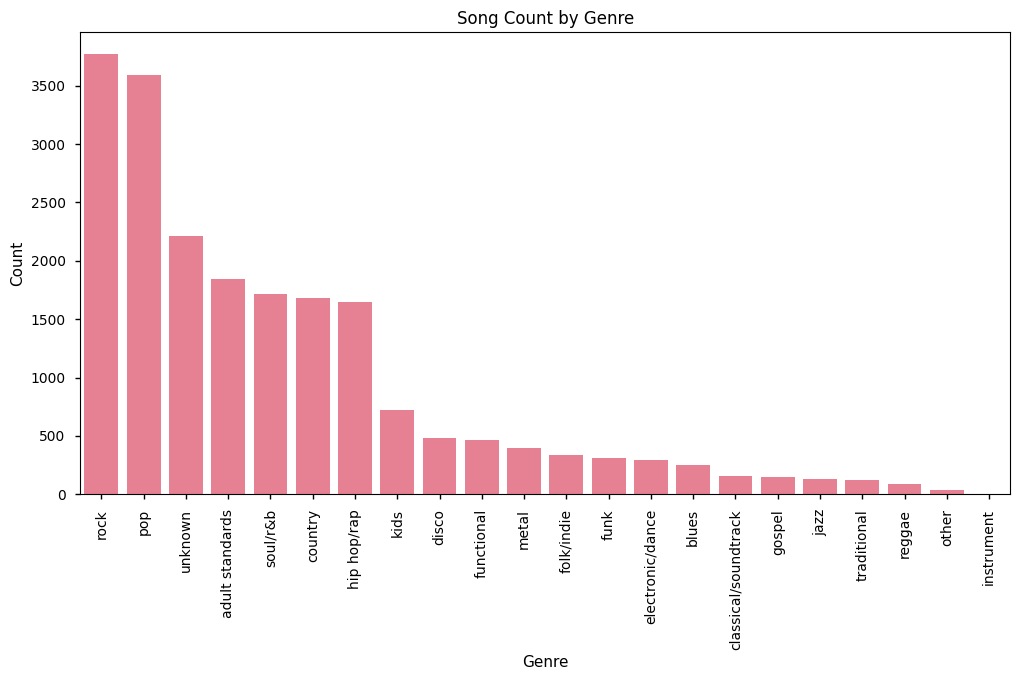

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index)
plt.title("Song Count by Genre")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [31]:
# Check the average score for 'unknown' genre vs. other genres
unknown_genre = df[df['genre'] == 'unknown']
unknown_score_mean = unknown_genre['score'].mean()
all_score_mean = df[df['genre'] != 'unknown']['score'].mean()
print(f"Average score for 'unknown' genre: {unknown_score_mean}")
print(f"Average score for known genres: {all_score_mean}")

Average score for 'unknown' genre: 627.722749886929
Average score for known genres: 795.5749546479028


I keep 'unknown' genres as a separate category: If unknown is frequent enough to have its own consistent pattern, keeping it as a separate genre category might be sufficient, allowing the model to learn any relationships that exist between unknown and other features.

## 6) Analyse temporal trend

<Figure size 1500x500 with 0 Axes>

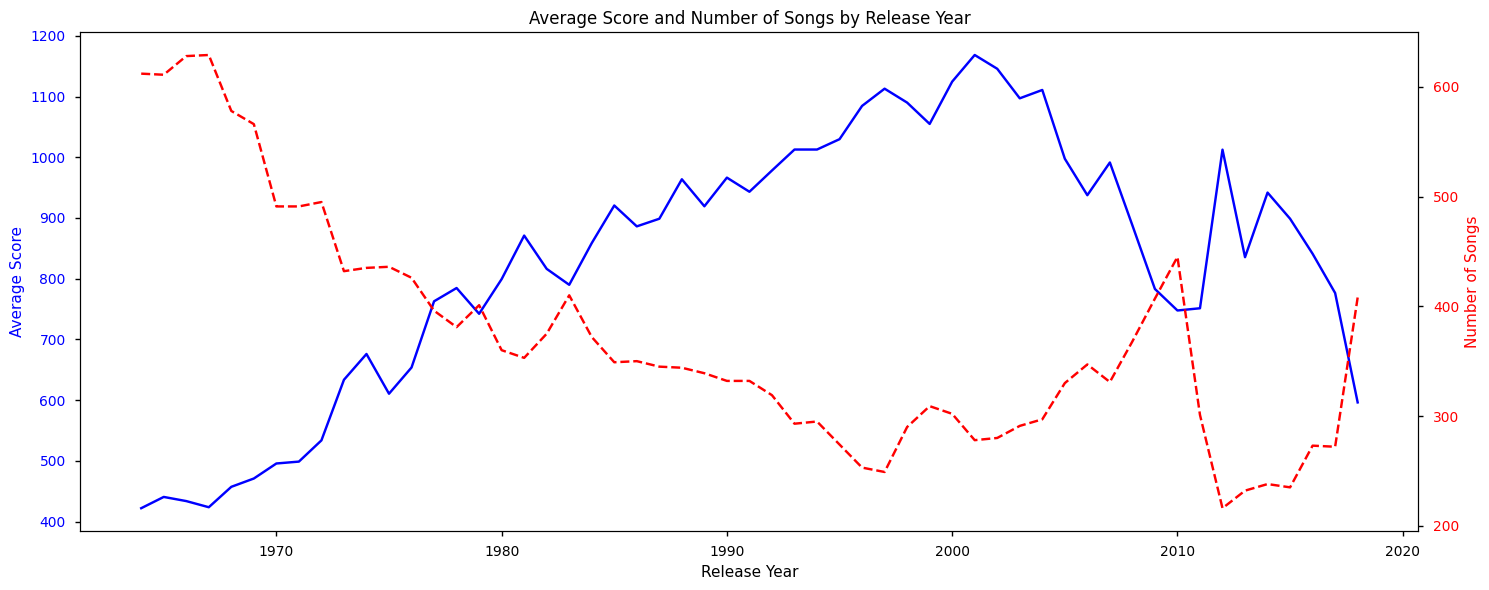

In [32]:
plt.figure(figsize=(15, 5))

# Average score by year
yearly_stats = df.groupby('release_year').agg({
    'score': ['mean', 'count']
}).reset_index()
yearly_stats.columns = ['year', 'mean_score', 'count']

# Create subplot with dual axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot average score
ax1.plot(yearly_stats['year'], yearly_stats['mean_score'], 'b-', label='Average Score')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Average Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot number of songs on secondary axis
ax2 = ax1.twinx()
ax2.plot(yearly_stats['year'], yearly_stats['count'], 'r--', label='Number of Songs')
ax2.set_ylabel('Number of Songs', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Average Score and Number of Songs by Release Year')
plt.tight_layout()
plt.show()


**Increase in Average Score till the 2000s:** 
This upward trend could indicate that songs released before the 2000s often had greater staying power on the charts, or that fewer songs achieved significant success, allowing the successful ones to reach higher scores. Fewer total releases may have resulted in less competition for chart spots.

**Decline in Average Score After the 2000s:**
This could align with the rise of digital platforms and changing listening habits. As music streaming and digital distribution expanded, the number of releases increased, possibly diluting the impact of individual songs on the charts.

**Inverse Trend of Average Score and Number of Releases:**
More Songs Released, Lower Average Score: This pattern implies that while more songs entered the market, fewer reached high levels of chart success, possibly due to market saturation or increased competition. It’s also possible that chart turnover became faster, making it harder for individual songs to stay at the top long enough to reach higher scores.
This trend might reflect shifts in the music industry's economic model, where more content is produced and consumed, but fewer songs dominate the cultural landscape as they once did.

**Fluctuations with Peaks Post-2010:** 
The peaks after 2010 could correspond to the rise of global streaming platforms, where certain hits gain rapid popularity, or to particular genres or trends that had brief but intense success. These fluctuations could also reflect changing listener preferences or the impact of digital platforms that can boost a song’s popularity rapidly but lead to shorter chart durations.

**Implications for Model:** 

'release_year' might be a valuable feature, as it captures underlying industry shifts. However, the non-linear trend suggests that it may interact with other features (e.g., genre, artist popularity, loudness) to better predict score.
This temporal trend could add meaningful context to the model, especially if combined with genre or artist/audio features to capture how industry and listener trends evolved.

## 7) Check for Correlations

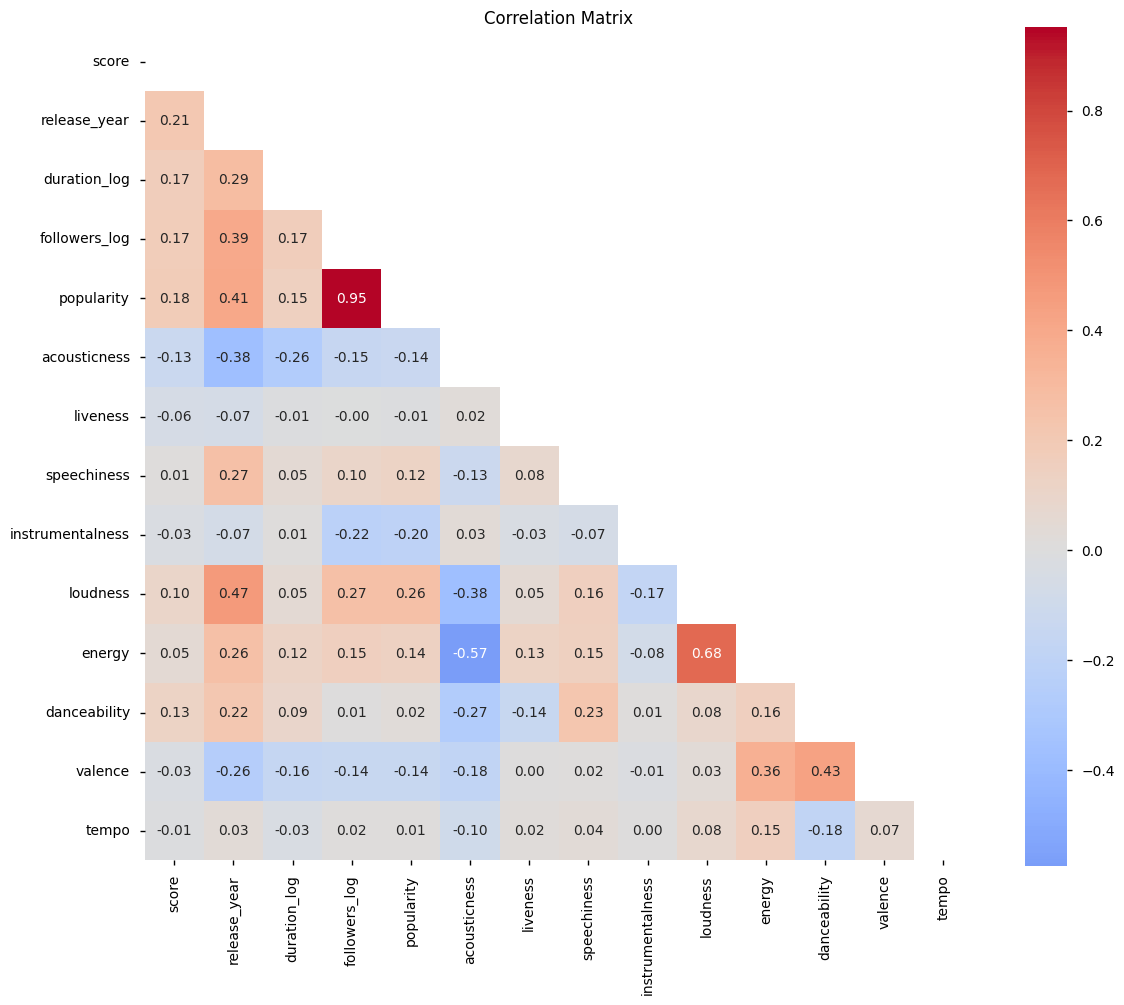

In [31]:
# Select only numeric columns
numeric_data = ['score', 'release_year', 'duration_log', 'followers_log', 'popularity', 'acousticness', 'liveness', 'speechiness', 
            'instrumentalness', 'loudness', 'energy', 'danceability', 'valence', 'tempo']

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_data].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [32]:
# Get the absolute values of the correlation matrix
abs_correlation_matrix = correlation_matrix.abs()

# Extract the upper triangle of the matrix, excluding the diagonal
upper_triangle = abs_correlation_matrix.where(np.triu(np.ones(abs_correlation_matrix.shape), k=1).astype(bool))

# Flatten the matrix, drop NaN values (for the lower triangle and diagonal), and sort in descending order
sorted_correlations = upper_triangle.unstack().dropna().sort_values(ascending=False)
sorted_correlations.head(10)

popularity     followers_log    0.952676
energy         loudness         0.682329
               acousticness     0.574477
loudness       release_year     0.470381
valence        danceability     0.434589
popularity     release_year     0.406906
followers_log  release_year     0.394391
acousticness   release_year     0.375588
loudness       acousticness     0.375285
valence        energy           0.356259
dtype: float64

**Score vs. Features:**

Release Year (0.21):  
There is a moderate positive correlation between release_year and score, supporting earlier findings that songs from recent years tend to have different score patterns compared to older songs. The temporal trend could be an essential feature.  

Popularity (0.18):  
The artist's popularity has a moderate positive correlation with score, indicating that well-known artists tend to achieve higher success in charts. This aligns with the expectation that popular artists may get more exposure.  

Loudness (0.10) and Danceability (0.13):  
These features have weak positive correlations with score, suggesting a slight influence on song success but not strong predictors on their own.

**Inter-Feature Correlations:**

Energy and Loudness (0.68):  
There’s a strong positive correlation between energy and loudness, which makes sense since high-energy tracks often have higher loudness levels. These features might carry overlapping information, so one of them could be dropped or carefully regularized to avoid multicollinearity if needed.  

Popularity and Followers (0.49):  
A moderately high correlation between popularity and followers is expected, as more popular artists often have a large following. These features might also provide similar information.

Loudness and Realease_year (0.47)

Valence and Danceability (0.43):  
A moderate correlation between valence (happiness of the track) and danceability could indicate that more upbeat songs tend to be danceable. Both features could be relevant for predicting score but may also introduce multicollinearity.

## 8) Feature importance analysis


=== Feature Importance Analysis ===
Features being analyzed: ['release_year', 'duration_ms', 'followers', 'popularity', 'acousticness', 'liveness', 'speechiness', 'instrumentalness', 'loudness', 'energy', 'danceability', 'valence', 'tempo']

Feature value ranges:
                           min           max
release_year       1964.000000  2.018000e+03
duration_ms       24604.000000  1.561133e+06
followers             0.000000  4.980672e+07
popularity            0.000000  1.000000e+02
acousticness          0.000001  9.950000e-01
liveness              0.013000  9.970000e-01
speechiness           0.000000  9.500000e-01
instrumentalness      0.000000  9.850000e-01
loudness            -30.896000 -4.500000e-02
energy                0.006640  9.980000e-01
danceability          0.000000  9.880000e-01
valence               0.000000  1.000000e+00
tempo                 0.000000  2.310280e+02


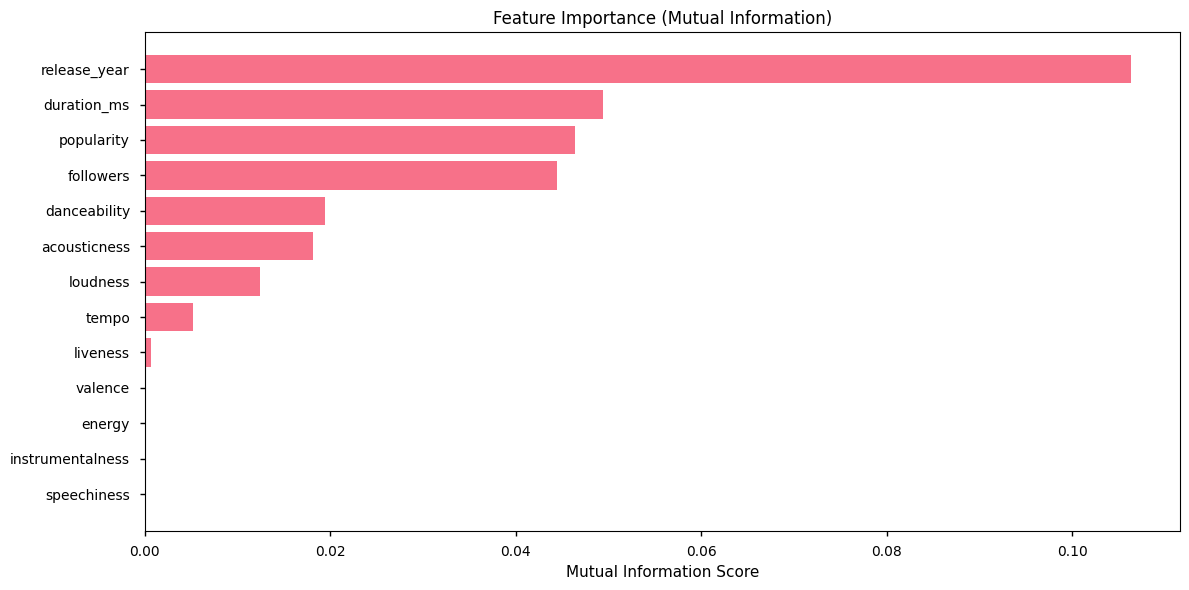


Feature Importance Scores:
speechiness: 0.0000
instrumentalness: 0.0000
energy: 0.0000
valence: 0.0000
liveness: 0.0007
tempo: 0.0053
loudness: 0.0125
acousticness: 0.0181
danceability: 0.0194
followers: 0.0445
popularity: 0.0464
duration_ms: 0.0494
release_year: 0.1063


In [40]:
X = df[numerical].copy()
y = df['score']

print("\n=== Feature Importance Analysis ===")
print("Features being analyzed:", numerical)
print("\nFeature value ranges:")
print(X.describe().loc[['min', 'max']].T)

# Calculate mutual information scores
mi_scores = mutual_info_regression(X, y)

# Plot feature importance
plt.figure(figsize=(12, 6))
importance_df = pd.DataFrame({'feature': numerical, 'importance': mi_scores})
importance_df = importance_df.sort_values('importance', ascending=True)
plt.barh(importance_df['feature'], importance_df['importance'])
plt.title('Feature Importance (Mutual Information)')
plt.xlabel('Mutual Information Score')
plt.tight_layout()
plt.show()

# Print feature importance scores
print("\nFeature Importance Scores:")
for feat, imp in zip(importance_df['feature'], importance_df['importance']):
    print(f"{feat}: {imp:.4f}")

In [ ]:
def mutual_info_scores(series):
    return mutual_info_score(series, df.score)

In [44]:
mi = df[categorical].apply(mutual_info_scores)
mi.sort_values(ascending=False).to_frame(name='MI')

,MI
genre,0.773579
key,0.669970
artist_type,0.260420
mode,0.091546
time_signature,0.075891
explicit,0.072111
song_type,0.065812


## 9) Conclusions before model selection

Based on these insights, data will need the following preparation during the validation framework:
* Encode categorical variables.
* Scale numerical features if necessary.

In [26]:
df

,score,release_year,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,valence,tempo,explicit,song_type,followers,popularity,artist_type,genre
0,133,1989,300440,G,1,4/4,0.181000,0.763,0.440,0.000457,...,-13.110,0.0388,0.4210,120.492,False,Solo,226699.0,61.0,band,pop
1,35,2009,215814,D,1,4/4,0.006300,0.600,0.153,0.855000,...,-14.028,0.0492,0.2550,172.050,False,Solo,11647.0,28.0,-,unknown
2,485,2003,233267,G,1,4/4,0.000065,0.553,0.717,0.128000,...,-5.857,0.0318,0.3180,127.947,False,Solo,1545572.0,72.0,band,country
3,268,2018,193680,"C♯, D♭",0,4/4,0.082200,0.353,0.755,0.000000,...,-6.276,0.7330,0.4370,191.153,False,Solo,5856419.0,84.0,singer,soul/r&b
4,1209,1994,291800,G,1,4/4,0.236000,0.348,0.924,0.000000,...,-3.048,0.0945,0.0869,114.117,False,Solo,243179.0,56.0,-,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20397,5779,1998,318773,B,1,4/4,0.315000,0.391,0.514,0.000006,...,-6.398,0.0447,0.4370,177.872,False,Solo,74445.0,56.0,singer,folk/indie
20398,153,1966,206427,D,0,4/4,0.100000,0.489,0.531,0.000000,...,-13.871,0.0345,0.6120,153.589,False,Solo,15728.0,46.0,-,pop
20399,623,1989,258147,C,1,4/4,0.000833,0.585,0.906,0.018900,...,-8.235,0.0564,0.7470,122.132,False,Solo,1283375.0,71.0,band,rock
20400,1403,2004,202760,G,1,4/4,0.123000,0.443,0.885,0.000031,...,-6.172,0.0414,0.5360,185.034,False,Solo,735490.0,65.0,duo,country
